In [1]:
import time
import hypergraph
import randomization
import matplotlib.pyplot as plt

Read the hypergraph data.  
This notebook shows an example of randomizing the synthetic hypergraph data named *syn1000*.

In [2]:
hypergraph_name = 'syn1000'
H = hypergraph.read_hypergraph(hypergraph_name)

In [3]:
H.print_info()

Number of nodes: 1000
Number of hyperedges: 4996
Average degree of node: 15.992
Maximum degree of node: 86
Frequency distribution of node degree: {67: 1, 46: 1, 39: 1, 81: 1, 86: 1, 47: 1, 13: 86, 29: 4, 34: 2, 24: 10, 26: 3, 38: 3, 30: 1, 25: 14, 40: 2, 11: 67, 19: 45, 43: 1, 35: 1, 20: 47, 18: 73, 9: 41, 23: 20, 17: 70, 31: 1, 51: 1, 16: 115, 15: 114, 21: 27, 22: 28, 14: 87, 12: 67, 33: 1, 27: 3, 10: 35, 7: 5, 8: 17, 6: 2, 5: 1}
Average size of hyperedge: 3.200960768614892
Maximum size of hyperedge: 5
Frequency distribution of hyperedge size: {2: 1996, 3: 1000, 4: 1000, 5: 1000}
Hypergraph is connected: True



Define a plot function for comparing properties between the original hypergraph and randomized one.

In [4]:
fontsize = 25
plt.rcParams["font.size"] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 7.5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7.5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['hatch.linewidth'] = 0.2

# Plot function
def compare_properties(H: hypergraph.HyperGraph, randH: hypergraph.HyperGraph):
    
    fig = plt.figure(figsize=(12, 12))
    
    ### Node degree distribution
    H_dd = H.node_degree_distribution(func='survival')
    randH_dd = randH.node_degree_distribution(func='survival')
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.scatter(list(H_dd.keys()), list(H_dd.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax1.scatter(list(randH_dd.keys()), list(randH_dd.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax1.set_xlim(left=0.5)
    #ax1.set_ylim(top=1.0)
    ax1.legend(loc='lower left', frameon=False, fontsize=20)
    ax1.set_title("Node degree distribution", fontsize=20)
    
    ### Average degree of nearest neighbors of nodes with degree k
    H_knn = H.average_degree_of_nearest_neighbors_of_nodes()
    randH_knn = randH.average_degree_of_nearest_neighbors_of_nodes()
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.scatter(list(H_knn.keys()), list(H_knn.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax2.scatter(list(randH_knn.keys()), list(randH_knn.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax2.set_xlim(left=0.5)
    ax2.set_ylim(bottom=0, top=max(max(H_knn.values()), max(randH_knn.values()))*1.05)
    ax2.set_title("Average degree of nearest neighbors\nof nodes with degree k", fontsize=20)
    
    ### Degree-dependent redundancy coefficient of the node
    H_drc = H.degree_dependent_node_redundancy_coefficient()
    randH_drc = randH.degree_dependent_node_redundancy_coefficient()
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.scatter(list(H_drc.keys()), list(H_drc.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax3.scatter(list(randH_drc.keys()), list(randH_drc.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax3.set_xlim(left=0.5)
    #ax3.set_ylim(bottom=0, top=max(max(H_drc.values()), max(randH_drc.values()))*1.05)
    ax3.set_title("Degree-dependent redundancy\ncoefficient of the node", fontsize=20)
    
    ### Hyperedge size distribution
    H_hs = H.hyperedge_size_distribution(func='survival')
    randH_hs = randH.hyperedge_size_distribution(func='survival')
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.set_xscale('log')
    ax4.set_yscale('log')
    ax4.scatter(list(H_hs.keys()), list(H_hs.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax4.scatter(list(randH_hs.keys()), list(randH_hs.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    ax4.set_title("Hyperedge size distribution", fontsize=20)
    
    #plt.legend(loc='upper center', bbox_to_anchor=(0, -.15), frameon=False, handletextpad=0.3, ncol=2)
    fig.tight_layout()
    plt.show()

Set the parameters of the hyper dk-series.  
The pair (d_v, d_e) must be (0, 0), (1, 0), (2, 0), (2.5, 0), (0, 1), (1, 1), (2, 1), or (2.5, 1).

In [5]:
(d_v, d_e) = ("0", "0")

Run a randomization of the original hypergraph using the hyper dk-series with given (d_v, d_e).

In [6]:
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()

Write out the randomized hypergraph to the folder *hyper-dk-series/py/outputs*.

In [7]:
rand_hypergraph_name="rand"
randomization.write_randomized_hypergraph(randH, rand_hypergraph_name, d_v, d_e)

Get the L1 distance for the properties between the original hypergraph and randomized one.  
Please see the following paper for the definition.  
Kazuki Nakajima, Kazuyuki Shudo, Naoki Masuda. Randomizing Hypergraphs Preserving Degree Correlation and Local Clustering. December 2021. [<a href="https://doi.org/10.1109/TNSE.2021.3133380">paper</a>]

In [8]:
dist = randomization.get_L1_distance(H, randH)
for prop in dist:
    print(prop, dist[prop])

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.234
Node degree correlation 0.4094392054605868
Node redundancy 0.9745704370991697
Hyperedge size distribution 0.6028823058446757


Get generation time in seconds.

In [9]:
elapsed = t_e - t_s
print(elapsed)

0.0787959098815918


Compare properties between the original hypergraph and randomized one.

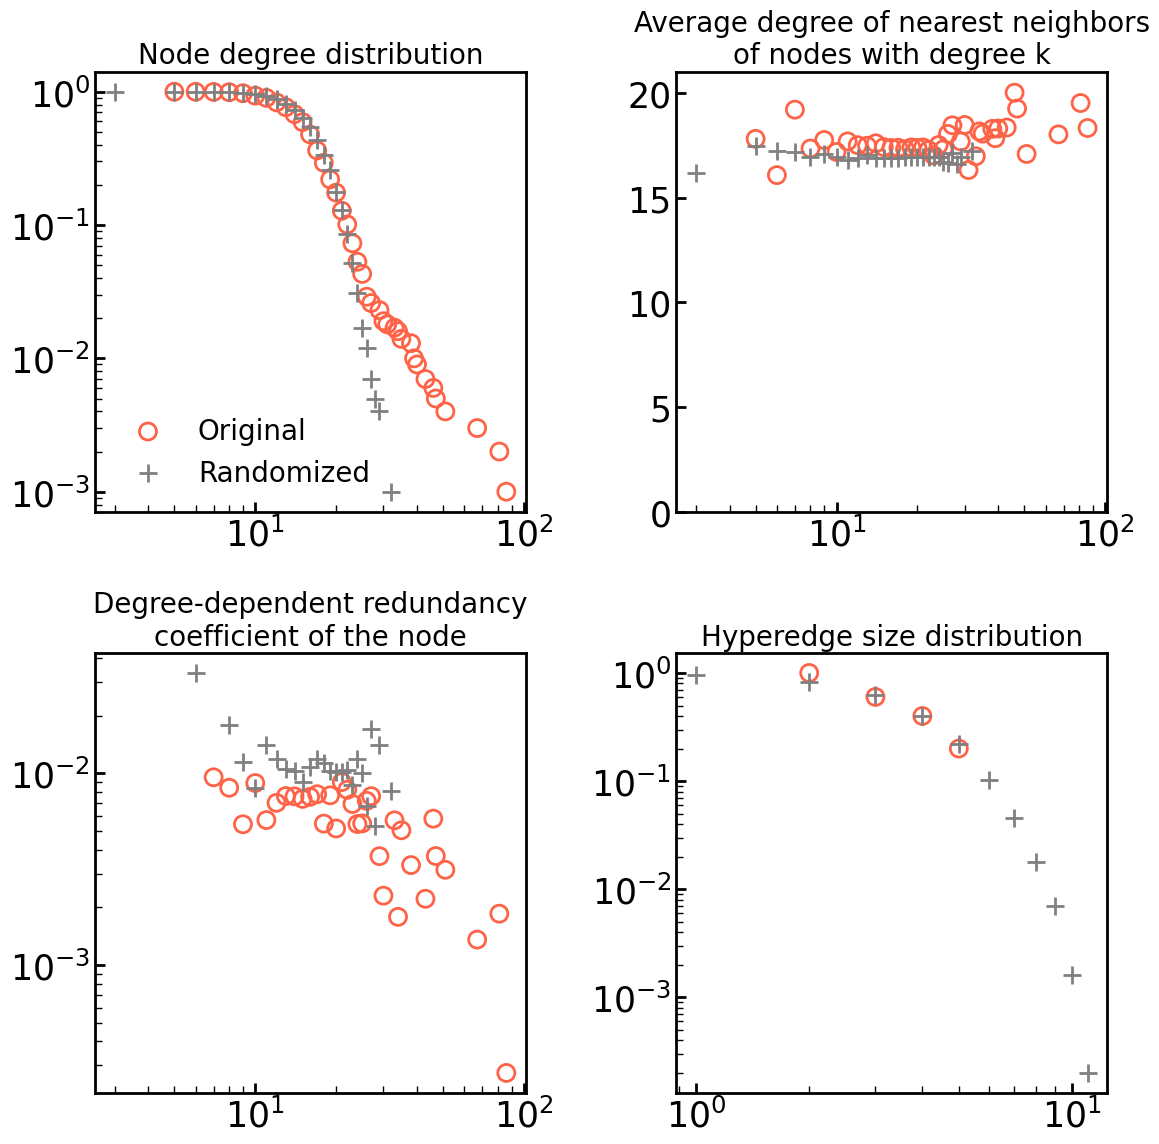

In [10]:
compare_properties(H, randH)

The usage is the same for other parameters of the hyper dk-series.  
For a detailed comparison of the hyper dk-series between different parameters, please refer to our paper.  
Kazuki Nakajima, Kazuyuki Shudo, Naoki Masuda. Randomizing Hypergraphs Preserving Degree Correlation and Local Clustering. December 2021. [<a href="https://doi.org/10.1109/TNSE.2021.3133380">paper</a>]

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.162288402436701
Node redundancy 1.1734896032751112
Hyperedge size distribution 0.6140912730184147
Elapsed time (sec):  0.021416902542114258


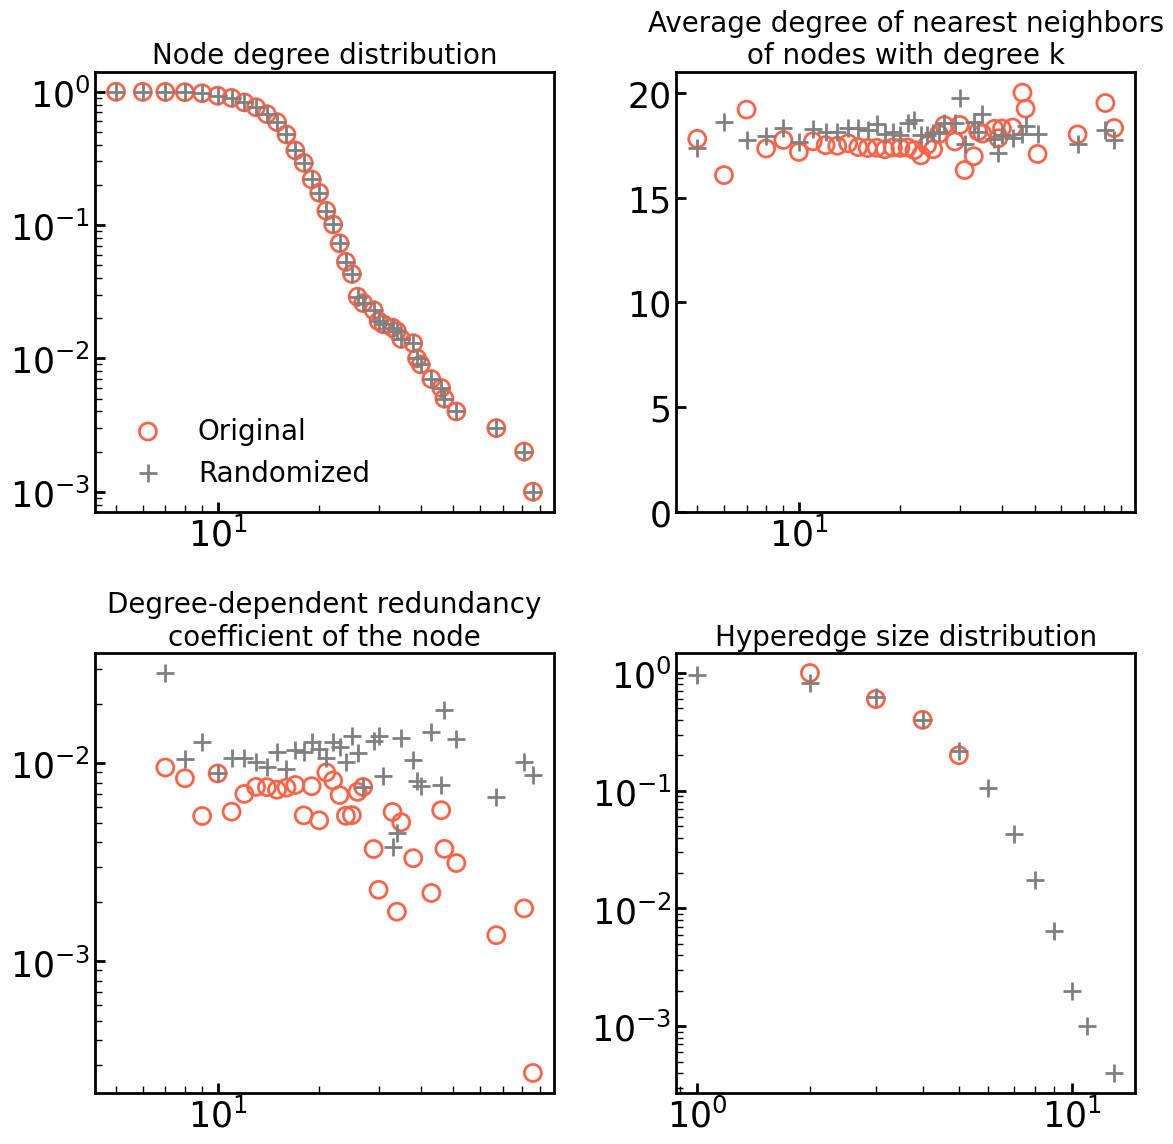

In [11]:
(d_v, d_e) = ("1", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.006853286681451721
Node redundancy 0.8150858264237613
Hyperedge size distribution 0.577261809447558
Elapsed time (sec):  28.026562929153442


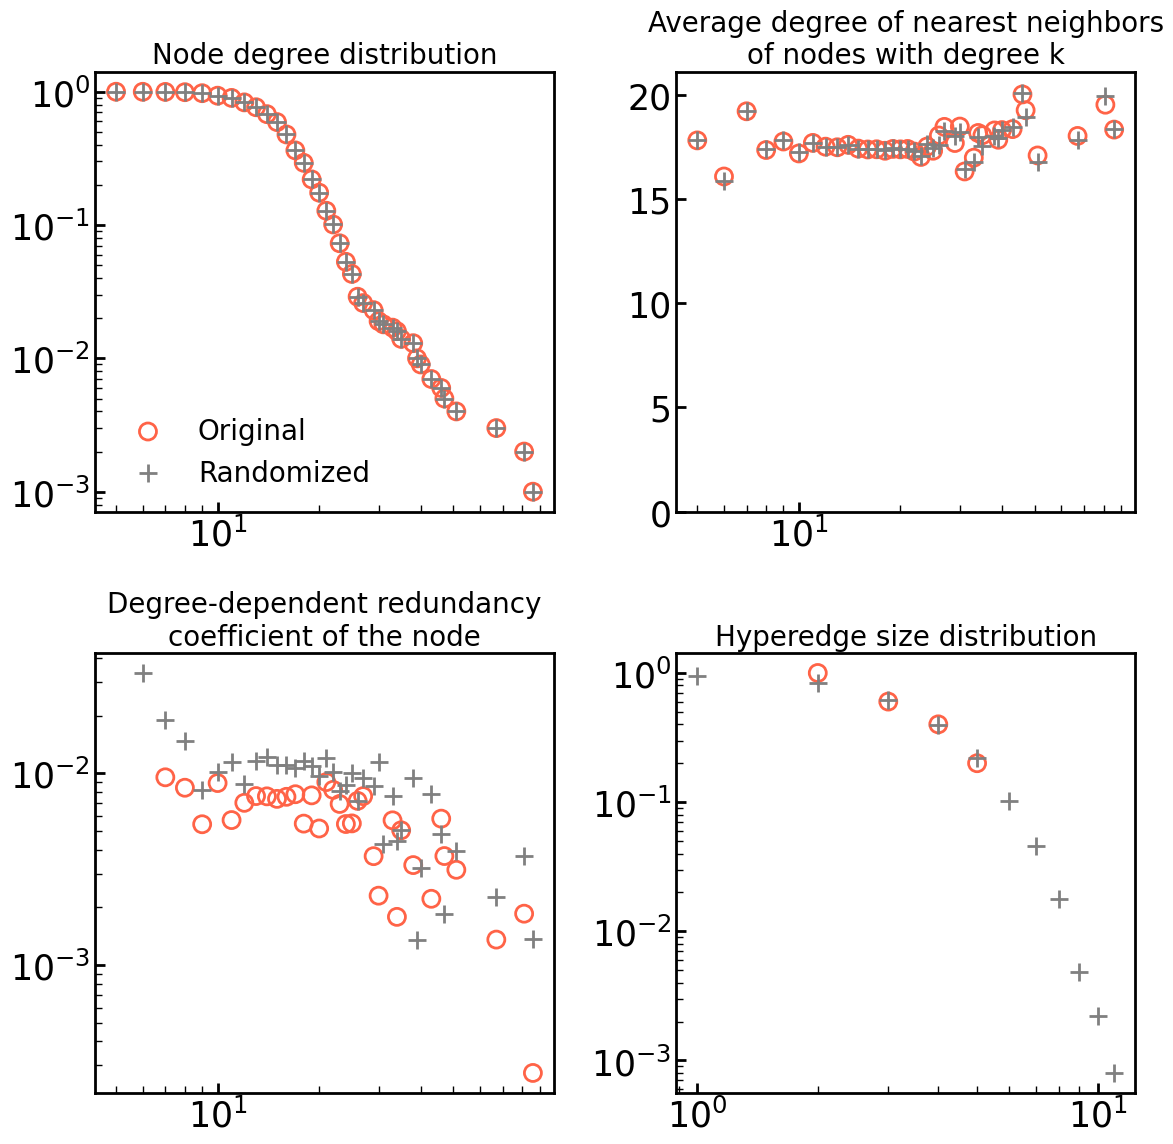

In [12]:
(d_v, d_e) = ("2", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.006691863934049781
Node redundancy 0.001302694506283683
Hyperedge size distribution 0.5960768614891914
Elapsed time (sec):  68.04441499710083


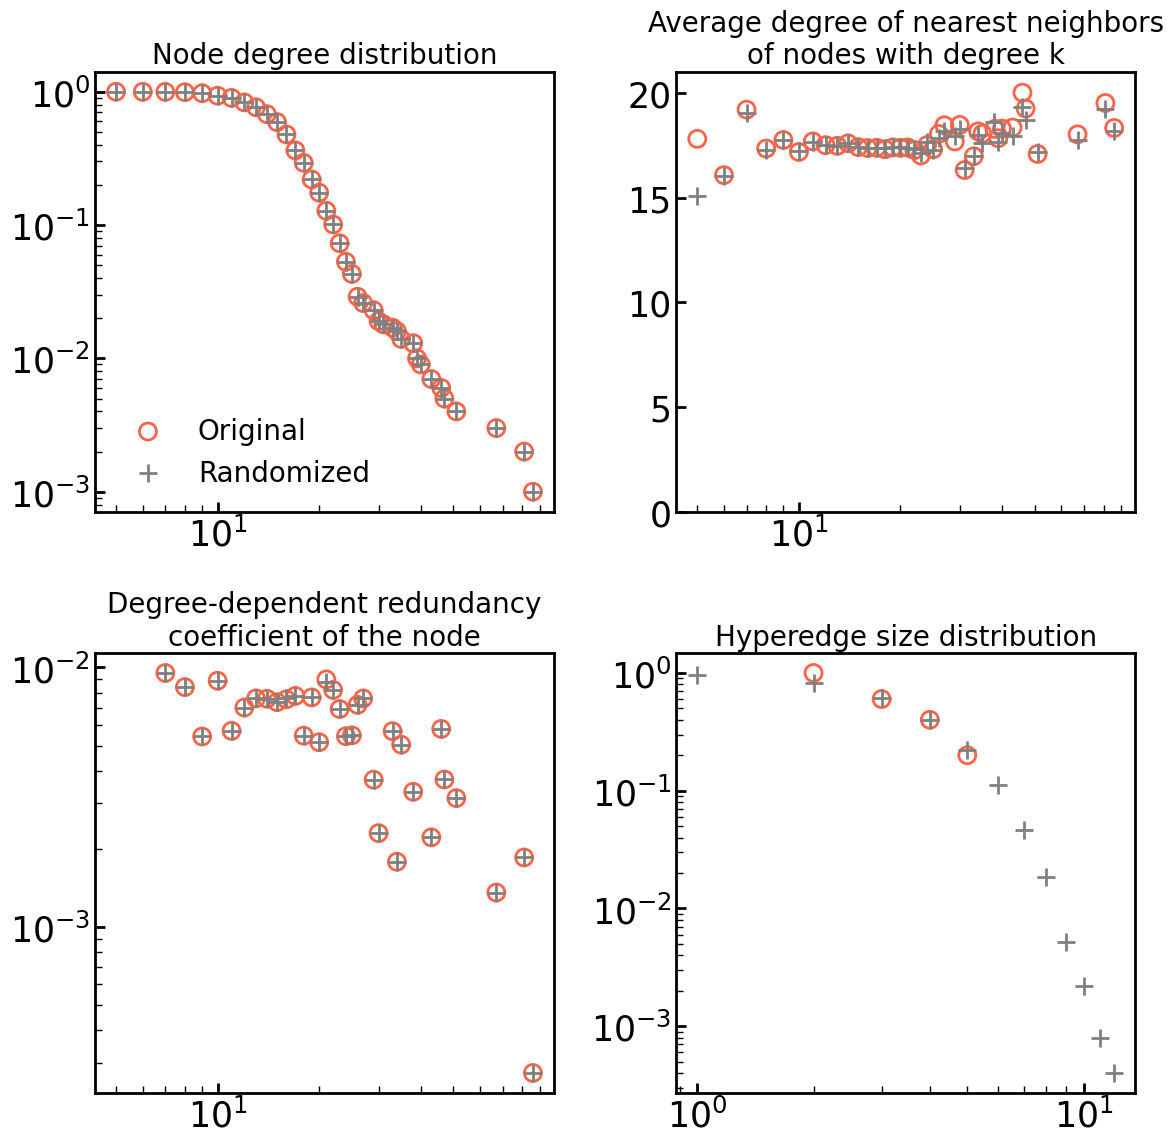

In [13]:
(d_v, d_e) = ("2.5", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.226
Node degree correlation 0.3668317774814269
Node redundancy 0.4523727174420601
Hyperedge size distribution 0.0
Elapsed time (sec):  0.0723719596862793


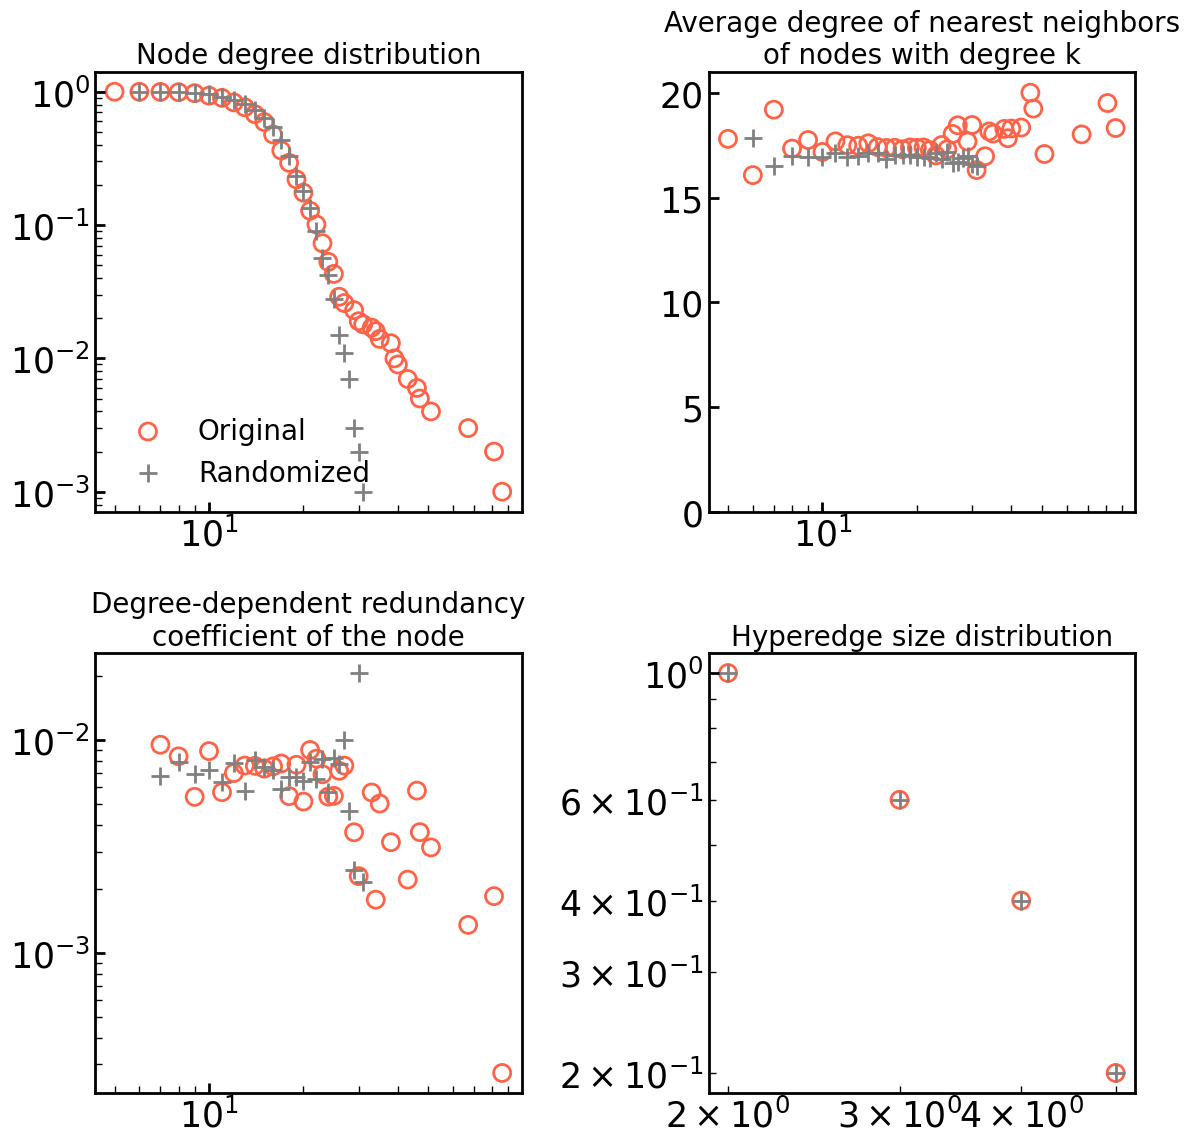

In [14]:
(d_v, d_e) = ("0", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.17698609258906473
Node redundancy 0.703215677261383
Hyperedge size distribution 0.0
Elapsed time (sec):  0.026265859603881836


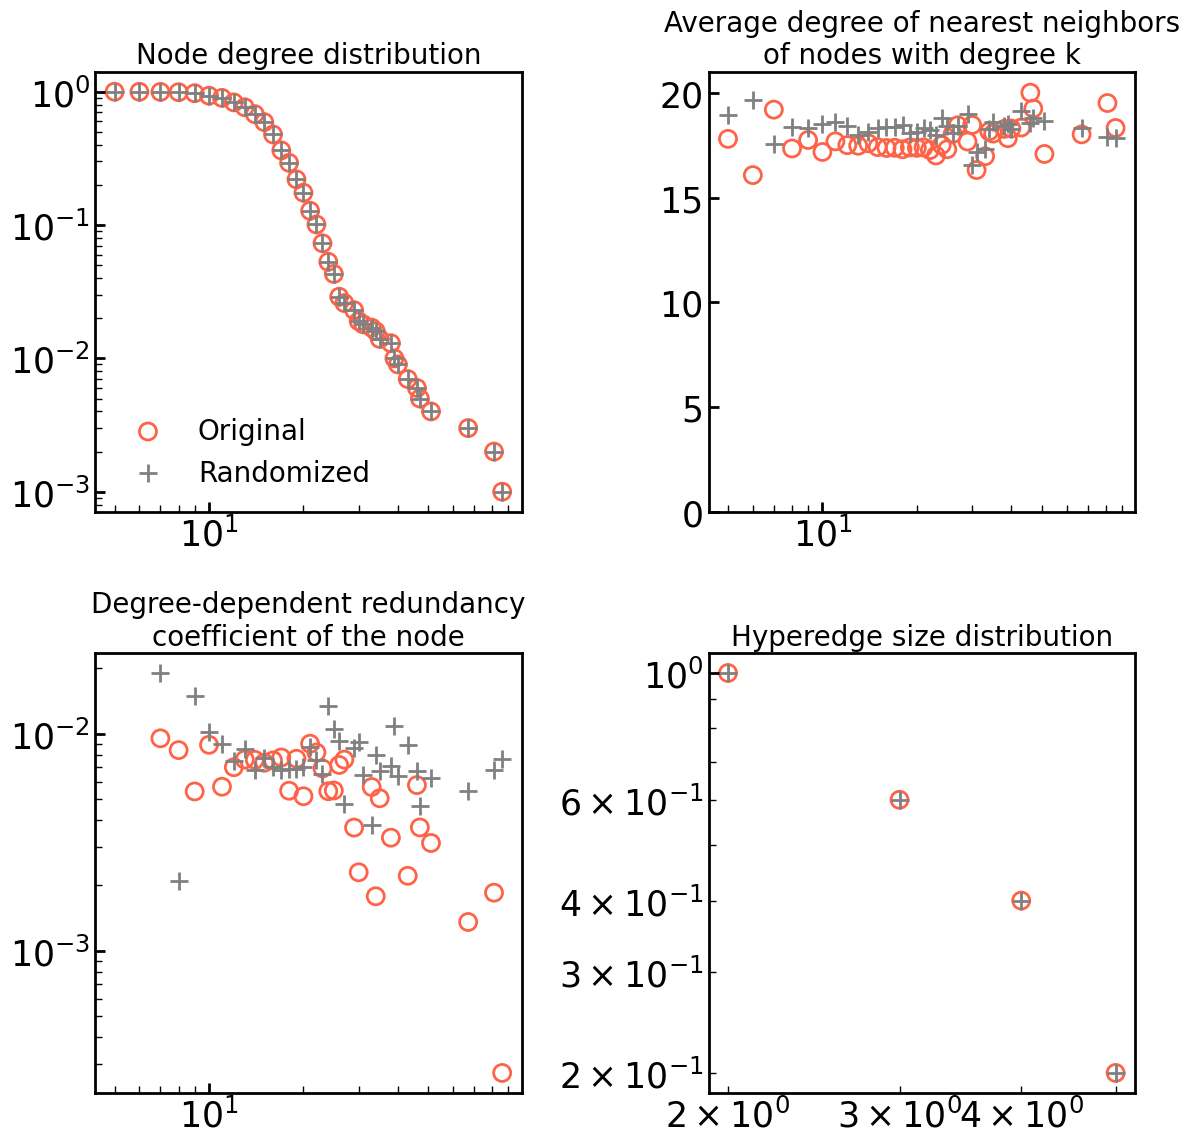

In [15]:
(d_v, d_e) = ("1", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.006286911792722448
Node redundancy 0.37368048924944747
Hyperedge size distribution 0.0
Elapsed time (sec):  23.948385000228882


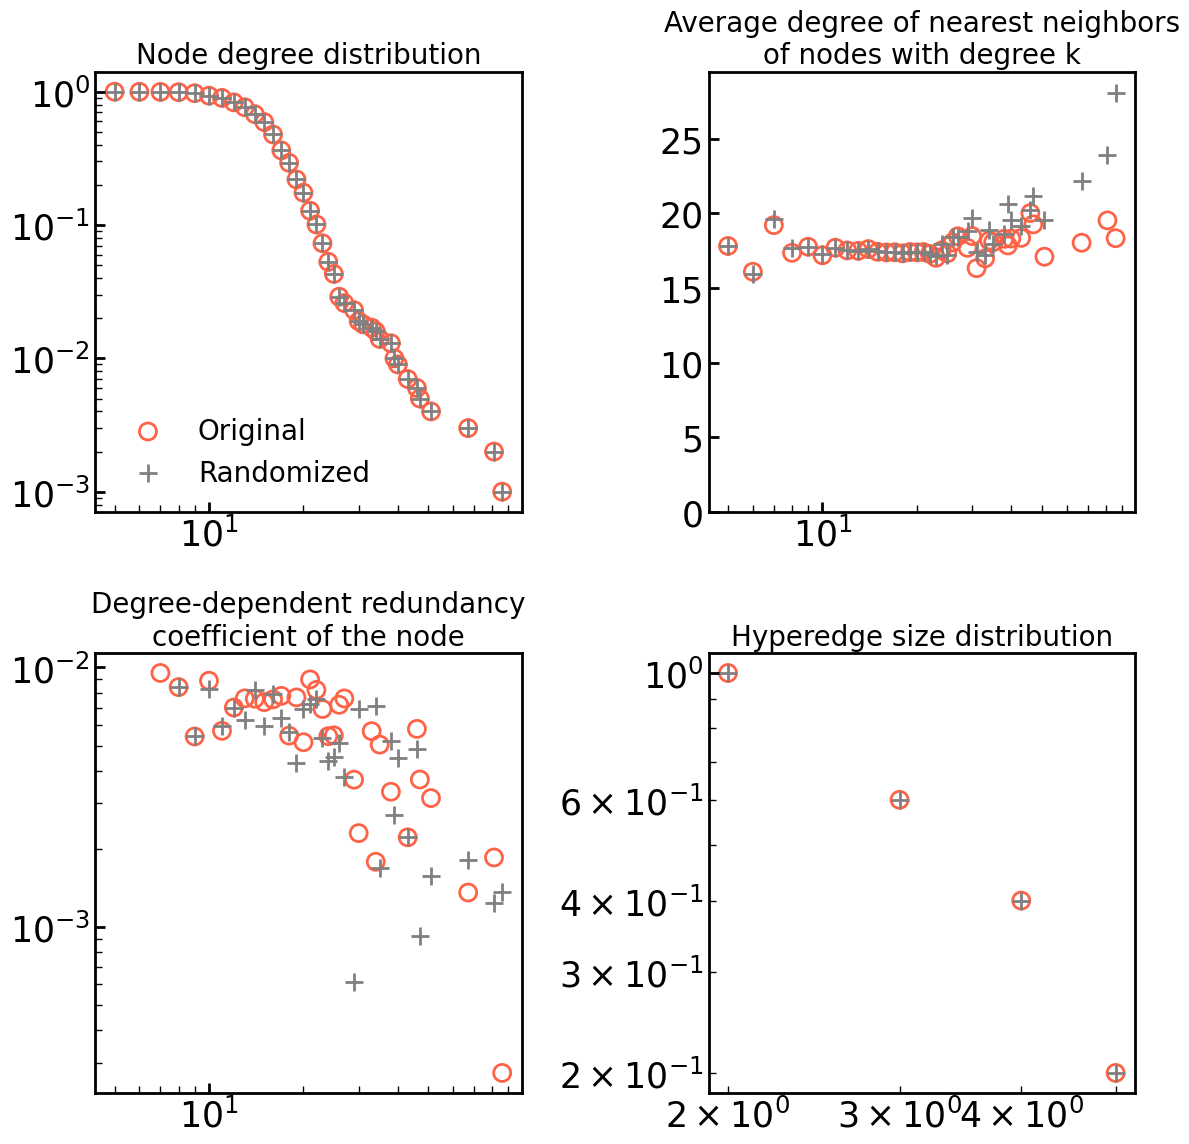

In [16]:
(d_v, d_e) = ("2", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

In [ ]:
(d_v, d_e) = ("2.5", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.006572680510573471
Node redundancy 8.854695824385527e-17
Hyperedge size distribution 0.0
Elapsed time (sec):  61.569170236587524
